In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)

model.compile(optimizer='adam',loss = loss_fn, metrics = ['accuracy'])

In [4]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2966 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9765


In [5]:
model.evaluate(x_test,y_test, verbose=2)

313/313 - 0s - loss: 0.0704 - accuracy: 0.9787 - 489ms/epoch - 2ms/step


[0.07036087661981583, 0.9786999821662903]

In [6]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 967us/step


In [13]:
np.argmax(predictions[1])

2

In [11]:
def plot_digit(i,predictions,y_train,x_train):
    y_train,x_train = y_train[i],x_train[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    predicted_label = np.argmax(predictions[i])
    print("predictions: ", predicted_label )

    plt.imshow(x_train, interpolation='nearest')
    plt.show()




predictions:  6


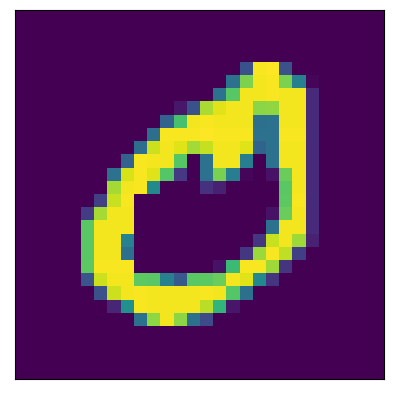

In [18]:
plot_digit(21,predictions,y_train,x_train)